In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import pandas as pd
df=pd.read_csv('/content/drive/MyDrive/datasets/accepted_2007_to_2018Q4.csv', low_memory=False)

In [ ]:
from IPython.display import display
columns_list = list(df.columns)
display(columns_list)

['id',
 'member_id',
 'loan_amnt',
 'funded_amnt',
 'funded_amnt_inv',
 'term',
 'int_rate',
 'installment',
 'grade',
 'sub_grade',
 'emp_title',
 'emp_length',
 'home_ownership',
 'annual_inc',
 'verification_status',
 'issue_d',
 'loan_status',
 'pymnt_plan',
 'url',
 'desc',
 'purpose',
 'title',
 'zip_code',
 'addr_state',
 'dti',
 'delinq_2yrs',
 'earliest_cr_line',
 'fico_range_low',
 'fico_range_high',
 'inq_last_6mths',
 'mths_since_last_delinq',
 'mths_since_last_record',
 'open_acc',
 'pub_rec',
 'revol_bal',
 'revol_util',
 'total_acc',
 'initial_list_status',
 'out_prncp',
 'out_prncp_inv',
 'total_pymnt',
 'total_pymnt_inv',
 'total_rec_prncp',
 'total_rec_int',
 'total_rec_late_fee',
 'recoveries',
 'collection_recovery_fee',
 'last_pymnt_d',
 'last_pymnt_amnt',
 'next_pymnt_d',
 'last_credit_pull_d',
 'last_fico_range_high',
 'last_fico_range_low',
 'collections_12_mths_ex_med',
 'mths_since_last_major_derog',
 'policy_code',
 'application_type',
 'annual_inc_joint',
 '

In [ ]:
df = df.dropna(subset=[
    'loan_amnt', 'funded_amnt', 'funded_amnt_inv', 'term', 'int_rate', 'installment',
    'grade', 'sub_grade', 'issue_d', 'emp_length', 'home_ownership', 'annual_inc',
    'verification_status', 'purpose', 'dti', 'earliest_cr_line', 'fico_range_low',
    'fico_range_high', 'open_acc', 'total_acc', 'revol_bal', 'revol_util',
    'inq_last_6mths', 'delinq_2yrs', 'mths_since_last_delinq', 'mths_since_last_record',
    'pub_rec', 'collections_12_mths_ex_med', 'mths_since_last_major_derog', 'out_prncp',
    'out_prncp_inv', 'total_pymnt', 'total_pymnt_inv', 'total_rec_prncp', 'total_rec_int',
    'total_rec_late_fee', 'recoveries', 'collection_recovery_fee', 'last_pymnt_d',
    'last_pymnt_amnt', 'next_pymnt_d', 'last_credit_pull_d'
])
distinct_loan_statuses = df['loan_status'].unique()
print(distinct_loan_statuses)

['Current' 'Late (31-120 days)' 'In Grace Period' 'Late (16-30 days)']


In [ ]:
df.tail()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,hardship_payoff_balance_amount,hardship_last_payment_amount,disbursement_method,debt_settlement_flag,debt_settlement_flag_date,settlement_status,settlement_date,settlement_amount,settlement_percentage,settlement_term
2260612,90114941,NaN,18850.0,18850.0,18850.0,60 months,15.59,454.30,C,C5,...,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
2260628,89885324,NaN,11200.0,11200.0,11200.0,60 months,9.49,235.17,B,B2,...,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
2260638,88553529,NaN,12000.0,12000.0,12000.0,60 months,11.49,263.86,B,B5,...,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
2260668,90052831,NaN,16000.0,16000.0,16000.0,60 months,13.99,372.21,C,C3,...,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
2260695,88977788,NaN,24000.0,24000.0,24000.0,60 months,10.49,515.74,B,B3,...,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
default_statuses = ['Charged Off', 'Default', 'Late (31-120 days)', 'Does not meet the credit policy. Status:Charged Off']
non_default_statuses = ['Fully Paid', 'Current', 'In Grace Period', 'Late (16-30 days)', 'Does not meet the credit policy. Status:Fully Paid']

df['is_default'] = df['loan_status'].apply(lambda x: 1 if x in default_statuses else 0 if x in non_default_statuses else None)

print(df)

               id  member_id  loan_amnt  funded_amnt  funded_amnt_inv  \
34       68537655        NaN    16800.0      16800.0          16800.0   
42       68615044        NaN    16000.0      16000.0          16000.0   
461      68052151        NaN    11725.0      11725.0          11725.0   
563      68341583        NaN    14400.0      14400.0          14400.0   
590      68566382        NaN    18000.0      18000.0          18000.0   
...           ...        ...        ...          ...              ...   
2260612  90114941        NaN    18850.0      18850.0          18850.0   
2260628  89885324        NaN    11200.0      11200.0          11200.0   
2260638  88553529        NaN    12000.0      12000.0          12000.0   
2260668  90052831        NaN    16000.0      16000.0          16000.0   
2260695  88977788        NaN    24000.0      24000.0          24000.0   

               term  int_rate  installment grade sub_grade  ...  \
34        60 months     12.88       381.23     C        

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score, confusion_matrix

features = [
    'loan_amnt', 'funded_amnt', 'funded_amnt_inv', 'term', 'int_rate', 'installment',
    'grade', 'sub_grade', 'issue_d', 'emp_length', 'home_ownership', 'annual_inc',
    'verification_status', 'purpose', 'dti', 'earliest_cr_line', 'fico_range_low',
    'fico_range_high', 'open_acc', 'total_acc', 'revol_bal', 'revol_util',
    'inq_last_6mths', 'delinq_2yrs', 'mths_since_last_delinq', 'mths_since_last_record',
    'pub_rec', 'collections_12_mths_ex_med', 'mths_since_last_major_derog', 'out_prncp',
    'out_prncp_inv', 'total_pymnt', 'total_pymnt_inv', 'total_rec_prncp', 'total_rec_int',
    'total_rec_late_fee', 'recoveries', 'collection_recovery_fee', 'last_pymnt_d',
    'last_pymnt_amnt', 'next_pymnt_d', 'last_credit_pull_d'
]

X = df[features].copy()
y = df['is_default']

# Convert 'term' from ' 36 months' to 36 and ' 60 months' to 60
X['term'] = X['term'].apply(lambda x: int(x.strip().split()[0]))

# Convert categorical variables to numeric
categorical_features = ['grade', 'sub_grade', 'emp_length', 'home_ownership',
                        'verification_status', 'purpose', 'issue_d', 'earliest_cr_line',
                        'last_pymnt_d', 'next_pymnt_d', 'last_credit_pull_d']

# Encode categorical variables
label_encoders = {}
for col in categorical_features:
    le = LabelEncoder()
    X.loc[:, col] = le.fit_transform(X[col].astype(str))
    label_encoders[col] = le

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
model = MLPClassifier(activation='relu', max_iter=100000, learning_rate_init=0.0001, hidden_layer_sizes=(13, 7, 13),random_state=42)
model.fit(X_train, y_train)

print("Training score:", model.score(X_train, y_train))

predictions = model.predict(X_test)
print("Predictions:", predictions)

accuracy = accuracy_score(y_test, predictions)
conf_matrix = confusion_matrix(y_test, predictions)

print("Accuracy:", accuracy)
print("Confusion Matrix:\n", conf_matrix)


Training score: 0.9637323943661972
Predictions: [0 0 0 ... 0 0 0]
Accuracy: 0.9659959758551308
Confusion Matrix:
 [[4801    0]
 [ 169    0]]


In [ ]:
model = MLPClassifier(activation='identity', max_iter=100000, learning_rate_init=0.0001, hidden_layer_sizes=(13, 7, 13),random_state=42)
model.fit(X_train, y_train)

print("Training score:", model.score(X_train, y_train))

predictions = model.predict(X_test)
print("Predictions:", predictions)

accuracy = accuracy_score(y_test, predictions)
conf_matrix = confusion_matrix(y_test, predictions)

print("Accuracy:", accuracy)
print("Confusion Matrix:\n", conf_matrix)


Training score: 0.9271629778672033
Predictions: [0 0 0 ... 0 0 0]
Accuracy: 0.9287726358148893
Confusion Matrix:
 [[4600  201]
 [ 153   16]]


In [ ]:
model = MLPClassifier(activation='logistic', max_iter=100000, learning_rate_init=0.0001, hidden_layer_sizes=(13, 7, 13),random_state=42)
model.fit(X_train, y_train)

print("Training score:", model.score(X_train, y_train))

predictions = model.predict(X_test)
print("Predictions:", predictions)

accuracy = accuracy_score(y_test, predictions)
conf_matrix = confusion_matrix(y_test, predictions)

print("Accuracy:", accuracy)
print("Confusion Matrix:\n", conf_matrix)


Training score: 0.9637323943661972
Predictions: [0 0 0 ... 0 0 0]
Accuracy: 0.9659959758551308
Confusion Matrix:
 [[4801    0]
 [ 169    0]]


In [ ]:
model = MLPClassifier(activation='tanh', max_iter=100000, learning_rate_init=0.0001, hidden_layer_sizes=(13, 7, 13),random_state=42)
model.fit(X_train, y_train)

print("Training score:", model.score(X_train, y_train))

predictions = model.predict(X_test)
print("Predictions:", predictions)

accuracy = accuracy_score(y_test, predictions)
conf_matrix = confusion_matrix(y_test, predictions)

print("Accuracy:", accuracy)
print("Confusion Matrix:\n", conf_matrix)


Training score: 0.9637323943661972
Predictions: [0 0 0 ... 0 0 0]
Accuracy: 0.9659959758551308
Confusion Matrix:
 [[4801    0]
 [ 169    0]]


In [ ]:
model = MLPClassifier(activation='tanh', max_iter=10000000000, learning_rate_init=0.0000001, hidden_layer_sizes=(130, 70, 130),random_state=42)
model.fit(X_train, y_train)

print("Training score:", model.score(X_train, y_train))

predictions = model.predict(X_test)
print("Predictions:", predictions)

accuracy = accuracy_score(y_test, predictions)
conf_matrix = confusion_matrix(y_test, predictions)

print("Accuracy:", accuracy)
print("Confusion Matrix:\n", conf_matrix)


Training score: 0.9637323943661972
Predictions: [0 0 0 ... 0 0 0]
Accuracy: 0.9659959758551308
Confusion Matrix:
 [[4801    0]
 [ 169    0]]


In [ ]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()

model.fit(X_train, y_train)
print("Training score:", model.score(X_train, y_train))

predictions = model.predict(X_test)
print("Predictions:", predictions)

accuracy = accuracy_score(y_test, predictions)
conf_matrix = confusion_matrix(y_test, predictions)

print("Accuracy:", accuracy)
print("Confusion Matrix:\n", conf_matrix)









Training score: 0.9637323943661972
Predictions: [0 0 0 ... 0 0 0]
Accuracy: 0.9659959758551308
Confusion Matrix:
 [[4801    0]
 [ 169    0]]


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [ ]:
from sklearn.naive_bayes import BernoulliNB

model = BernoulliNB()

model.fit(X_train, y_train)
print("Training score:", model.score(X_train, y_train))

predictions = model.predict(X_test)
print("Predictions:", predictions)

accuracy = accuracy_score(y_test, predictions)
conf_matrix = confusion_matrix(y_test, predictions)

print("Accuracy:", accuracy)
print("Confusion Matrix:\n", conf_matrix)

Training score: 0.9720824949698189
Predictions: [0 0 0 ... 0 0 0]
Accuracy: 0.972635814889336
Confusion Matrix:
 [[4801    0]
 [ 136   33]]


In [ ]:
from sklearn.naive_bayes import MultinomialNB

model = MultinomialNB()

model.fit(X_train, y_train)
print("Training score:", model.score(X_train, y_train))

predictions = model.predict(X_test)
print("Predictions:", predictions)

accuracy = accuracy_score(y_test, predictions)
conf_matrix = confusion_matrix(y_test, predictions)

print("Accuracy:", accuracy)
print("Confusion Matrix:\n", conf_matrix)

Training score: 0.5685613682092555
Predictions: [0 0 1 ... 0 0 0]
Accuracy: 0.5511066398390342
Confusion Matrix:
 [[2647 2154]
 [  77   92]]


In [ ]:
from sklearn.svm import SVC
model = SVC(kernel='linear')  # You can also use 'rbf', 'poly', 'sigmoid', etc.

model.fit(X_train, y_train)
print("Training score:", model.score(X_train, y_train))

predictions = model.predict(X_test)
print("Predictions:", predictions)

accuracy = accuracy_score(y_test, predictions)
conf_matrix = confusion_matrix(y_test, predictions)

print("Accuracy:", accuracy)
print("Confusion Matrix:\n", conf_matrix)

<ipython-input-5-6d6802e77c00>:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=model_names, y=accuracies, palette="viridis")


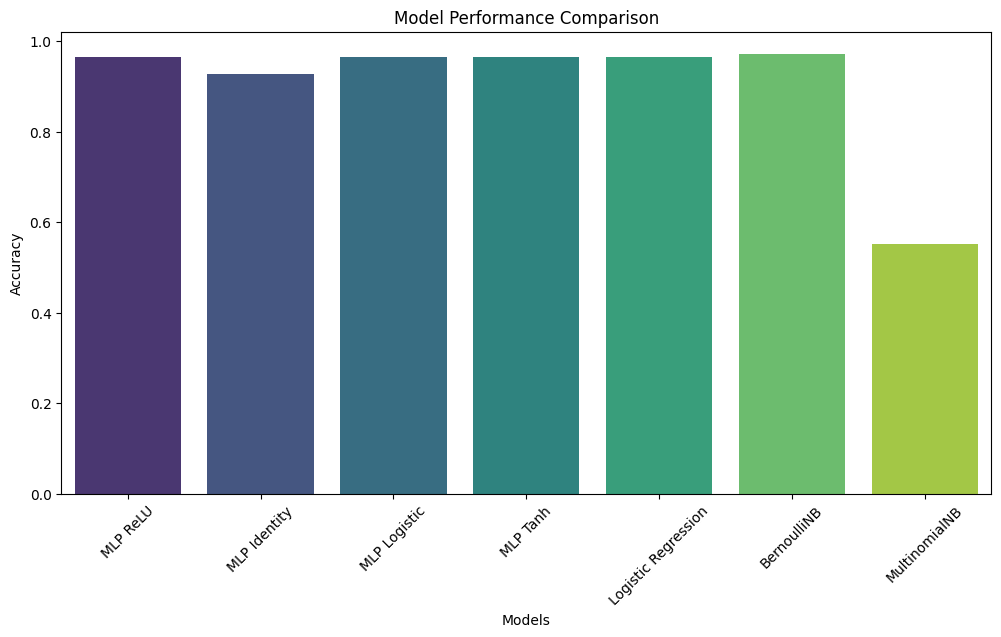

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Create a dictionary to store model names and their performance metrics
model_performance = {
    'MLP ReLU': {'accuracy': 0.965, 'confusion_matrix': [[4801, 0], [169, 0]]},
    'MLP Identity': {'accuracy': 0.928, 'confusion_matrix': [[4600, 201], [153, 16]]},
    'MLP Logistic': {'accuracy': 0.965, 'confusion_matrix': [[4801, 0], [169, 0]]},
    'MLP Tanh': {'accuracy': 0.965, 'confusion_matrix': [[4801, 0], [169, 0]]},
    'Logistic Regression': {'accuracy': 0.965, 'confusion_matrix': [[4801, 0], [169, 0]]},
    'BernoulliNB': {'accuracy': 0.972, 'confusion_matrix': [[4801, 0], [136, 33]]},
    'MultinomialNB': {'accuracy': 0.551, 'confusion_matrix': [[2647, 2154], [77, 92]]}
}

model_names = list(model_performance.keys())
accuracies = [model_performance[model]['accuracy'] for model in model_names]

plt.figure(figsize=(12, 6))
sns.barplot(x=model_names, y=accuracies, palette="viridis")
plt.xticks(rotation=45)
plt.xlabel('Models')
plt.ylabel('Accuracy')
plt.title('Model Performance Comparison')
plt.show()


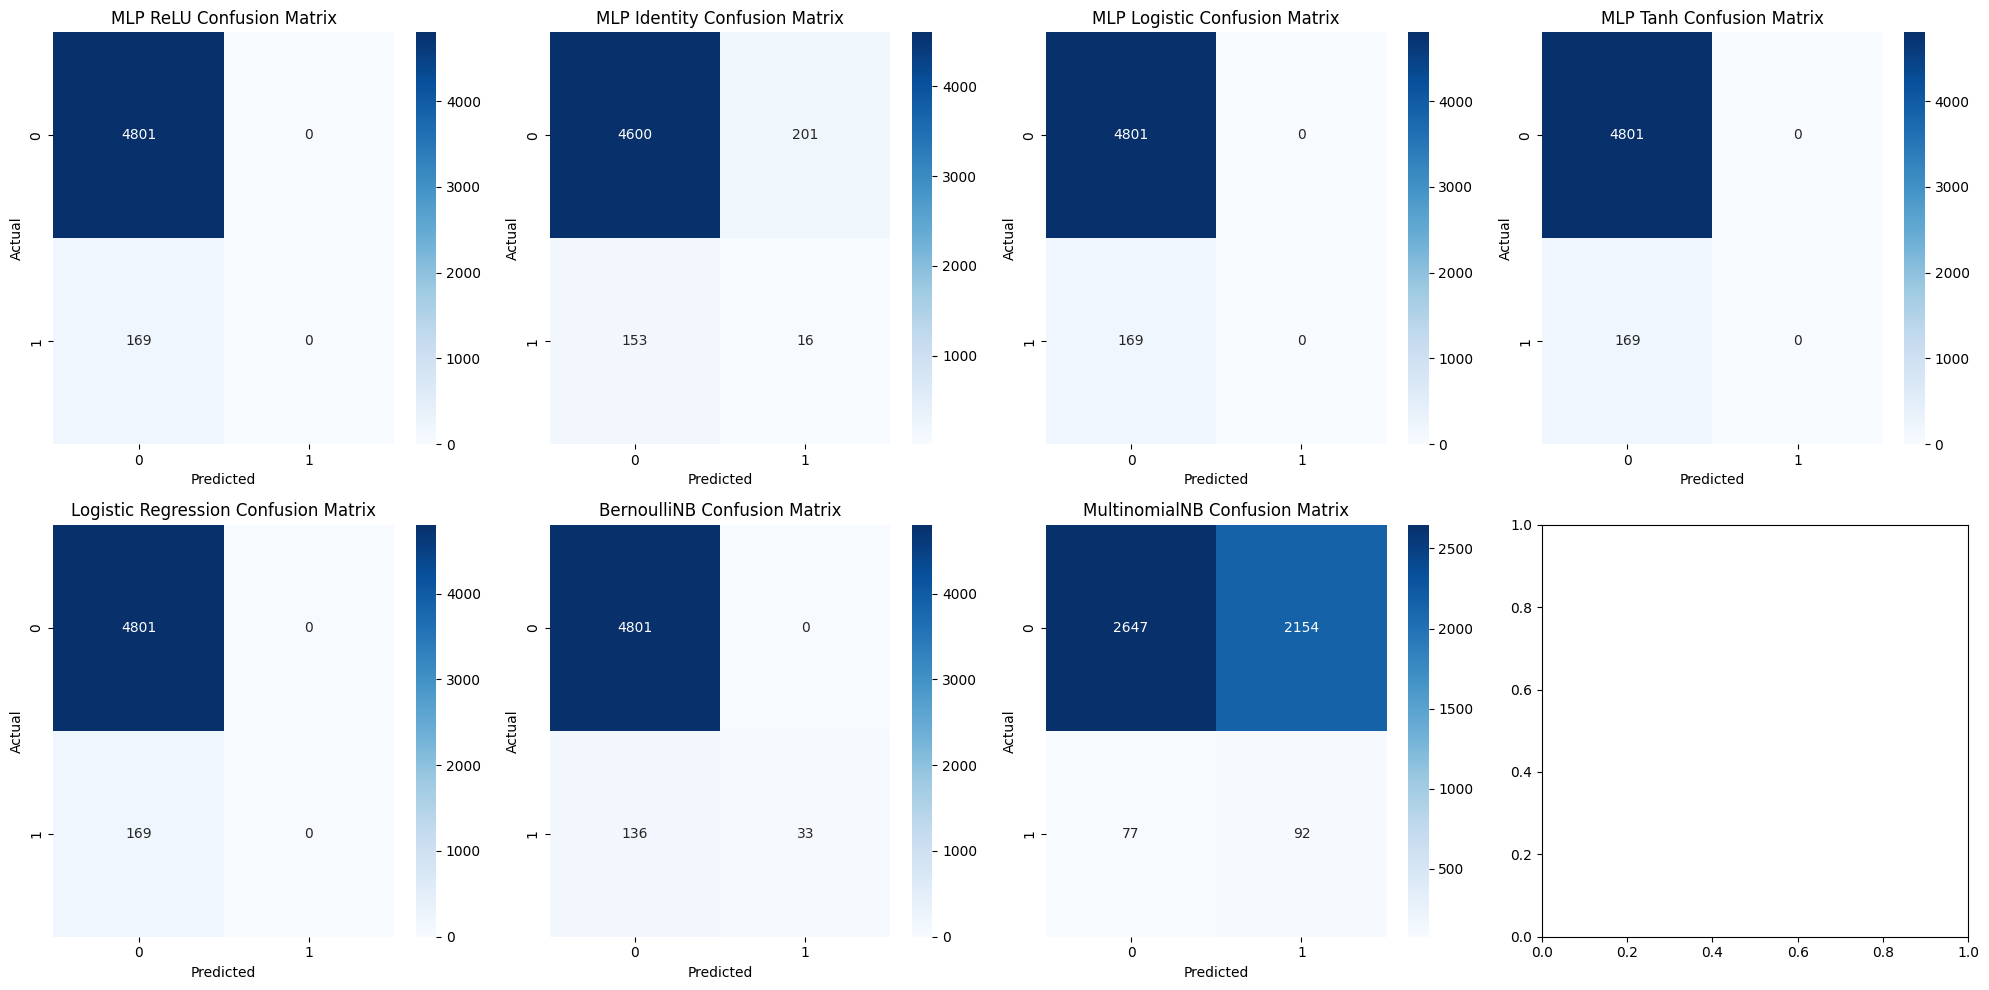

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

def plot_confusion_matrix(cm, model_name, ax):
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', ax=ax)
    ax.set_title(f'{model_name} Confusion Matrix')
    ax.set_xlabel('Predicted')
    ax.set_ylabel('Actual')

fig, axes = plt.subplots(2, 4, figsize=(20, 10))

axes = axes.flatten()

for i, model_name in enumerate(model_names):
    plot_confusion_matrix(np.array(model_performance[model_name]['confusion_matrix']), model_name, axes[i])

plt.tight_layout()
plt.show()
